In [179]:
# Bactesting for EMA

In [180]:
# Installing Libraries
!pip install numpy as np
!pip install pandas as pd
!pip install yfinance as yf
!pip install matplotlib.pyplot as plt
!pip install seaborn as sns

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [181]:
# Importing Libraries
import pandas as pd
import numpy as np
import yfinance as yf
import talib
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
# Download daily data from Yahoo Finance for SPY
df= yf.download("SPY", start="2021-01-03", end ="2022-11-07", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [183]:
# Print dataframe
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,375.309998,375.450012,364.820007,368.790009,359.773224,110210800
2021-01-05,368.100006,372.500000,368.049988,371.329987,362.251129,66426200
2021-01-06,369.709991,376.980011,369.119995,373.549988,364.416840,107997700
2021-01-07,376.100006,379.899994,375.910004,379.100006,369.831207,68766800
2021-01-08,380.589996,381.489990,377.100006,381.260010,371.938385,71677200
...,...,...,...,...,...,...
2022-10-31,386.440002,388.399994,385.260010,386.209991,386.209991,96631300
2022-11-01,390.140015,390.390015,383.290009,384.519989,384.519989,85407600
2022-11-02,383.899994,388.630005,374.760010,374.869995,374.869995,126990400


In [184]:
# Considering only closing values 
Close = df["Close"]

In [185]:
# Checking the datatype of Close
print(type(Close))

<class 'pandas.core.series.Series'>


In [186]:
# Extracting 6 ema using talib library
ema6 = talib.EMA(Close, timeperiod = 6)

In [187]:
# Extracting 120 ema using talib library
ema120 = talib.EMA(Close, timeperiod = 120)

In [188]:
# Printing EMA 6
ema6

Date
2021-01-04           NaN
2021-01-05           NaN
2021-01-06           NaN
2021-01-07           NaN
2021-01-08           NaN
                 ...    
2022-10-31    382.585059
2022-11-01    383.137896
2022-11-02    380.775639
2022-11-03    377.985459
2022-11-04    377.518187
Length: 465, dtype: float64

In [189]:
# Printing EMA120
ema120

Date
2021-01-04           NaN
2021-01-05           NaN
2021-01-06           NaN
2021-01-07           NaN
2021-01-08           NaN
                 ...    
2022-10-31    394.160337
2022-11-01    394.000992
2022-11-02    393.684777
2022-11-03    393.309988
2022-11-04    393.029658
Length: 465, dtype: float64

In [190]:
# Creating a new column by incorporating  EMA6 and EMA120 in the dataframe df
df["ema6"] = ema6
df["ema120"] = ema120

In [191]:
df

,Open,High,Low,Close,Adj Close,Volume,ema6,ema120
Date,,,,,,,,
2021-01-04,375.309998,375.450012,364.820007,368.790009,359.773224,110210800,NaN,NaN
2021-01-05,368.100006,372.500000,368.049988,371.329987,362.251129,66426200,NaN,NaN
2021-01-06,369.709991,376.980011,369.119995,373.549988,364.416840,107997700,NaN,NaN
2021-01-07,376.100006,379.899994,375.910004,379.100006,369.831207,68766800,NaN,NaN
2021-01-08,380.589996,381.489990,377.100006,381.260010,371.938385,71677200,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-10-31,386.440002,388.399994,385.260010,386.209991,386.209991,96631300,382.585059,394.160337
2022-11-01,390.140015,390.390015,383.290009,384.519989,384.519989,85407600,383.137896,394.000992
2022-11-02,383.899994,388.630005,374.760010,374.869995,374.869995,126990400,380.775639,393.684777


In [192]:
# Filling NAN vales backwards for Dataframe
df =df.fillna( method = "bfill")

<AxesSubplot:xlabel='Date'>

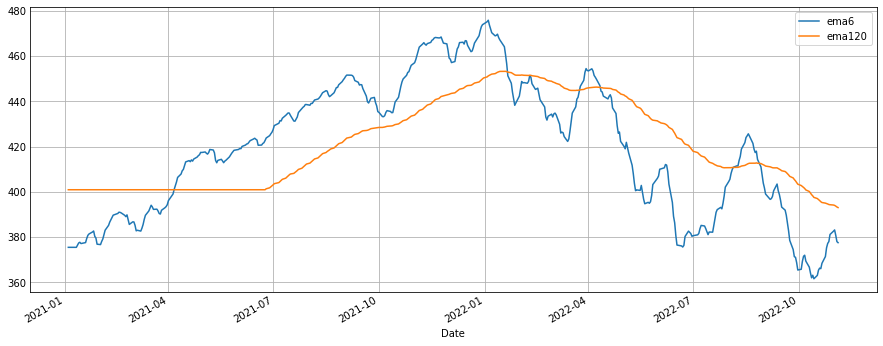

In [227]:
# Plotting ema6 Vs ema120
import matplotlib.pyplot as plt # Impot the relevant module
fig, ax = plt.subplots(figsize=(12, 5)) # Create the figure and axes object
# Plot the first x and y axes:
df.plot( y = 'ema6',ax = ax) 
# Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
# (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
df.plot(y = 'ema120', ax = ax,secondary_y =False) 

In [ ]:
# Need to backtest the results using code

In [ ]:
# Crtiteria for back testing
# Considering stoploss = 4% and Target price of 6%, entry price = Closing value
# To check the number of positions opened is less than or equal to Account size = $100000
# If stoploss is equal to next day loss, book loss and close the trade.
# If Target Price is equal to Next day high value, book profit and close the trade.

In [ ]:
# Using a for loop to compare 6ema with 120ema and generating a signal.
Buy_position = 0
sell_position = 0
Buy_Amount =0
sell_Amount =0
Account_Size = 100000
df["Stoploss"]=pd.DataFrame()
df["Target Price"]=pd.DataFrame()
quantity =1
#position = int
for i in range(len(df)):
    if df["ema6"][i] < df["ema120"][i]:  # ema6 should be less than ema120.
        #print(" Buy Signal")
        print("Buy Entry Price", df["Close"][i])
        df["Stoploss"][i] = df["Close"][i] - 0.04*df["Close"][i]
        df["Target Price"] = df["Close"][i] + 0.06*df["Close"][i]
        Buy_position = Buy_position + 1
        Buy_Amount = quantity*Buy_position
        if Buy_Amount > Account_Size:
            Break
        print("**********************")        
    else:
        #print('Sell signal')
        print("Sell Entry Price", df["Close"][i])
        df["Stoploss"] = df["Close"][i] - 0.04*df["Close"][i]
        df["Target Price"] = df["Close"][i] + 0.06*df["Close"][i]
        sell_position =sell_position +1
        Sell_Amount = quantity*sell_position
        print("**********************")
       